In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K



Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows,img_cols = 28, 28
input_shape =(28,28,1)
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


6


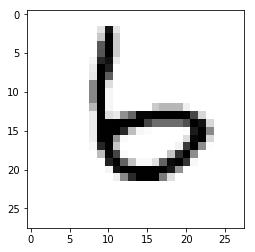

In [4]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7580 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples' )

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()  
print("") 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
__________

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train,y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose=1,
          validation_data=(x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])
          

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2634 - acc: 0.9200 - val_loss: 0.0616 - val_acc: 0.9802
Epoch 2/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0873 - acc: 0.9742 - val_loss: 0.0417 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0640 - acc: 0.9811 - val_loss: 0.0368 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0547 - acc: 0.9835 - val_loss: 0.0338 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0469 - acc: 0.9860 - val_loss: 0.0292 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0407 - acc: 0.9878 - val_loss: 0.0279 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0368 - acc: 0.9885 - val_loss: 0.0276 - 